In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from lbm_wetting.utils.structure_prep import read_vti_file

In [17]:
# Load velocity .dat file
velocity = np.loadtxt(
    "/hpcwork/fw641779/lbm/Test_Cones/test_run_1/output/vel_f1_005.dat"
)
print(velocity.shape)
velocity = velocity.reshape(38, 100,5, 3)
print(velocity.shape)

# # Plot velocity
# plt.imshow(velocity[:, :, 2])
# plt.colorbar()
# plt.show()


(57000,)
(38, 100, 5, 3)


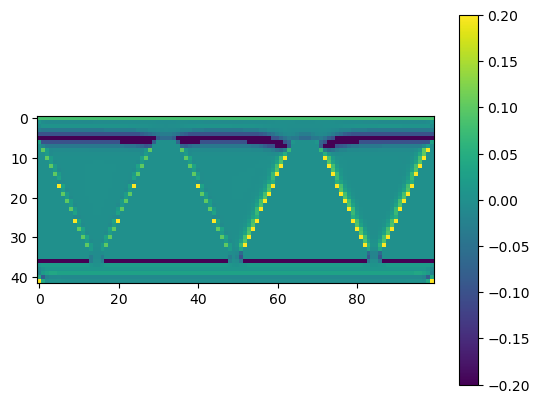

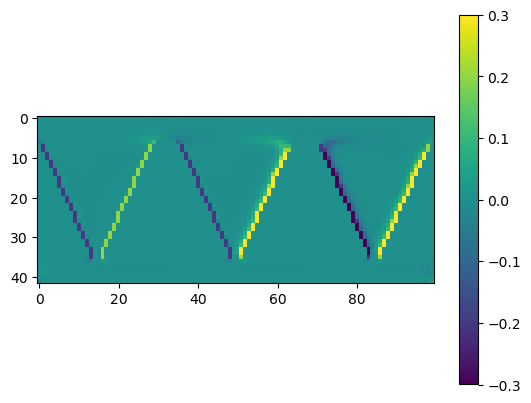

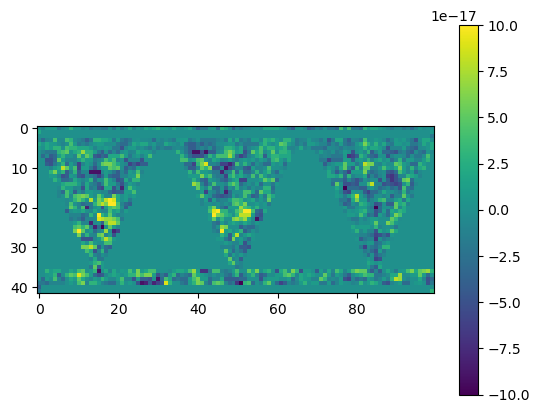

In [14]:
# Plot all three velocity components
for i in range(3):
    plt.imshow(velocity[:, :, 2, i])
    plt.colorbar()
    plt.show()


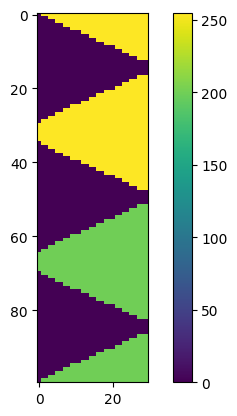

In [11]:
# Create 2D cones with decreasing diameter

structure = np.ones((100, 30,5), dtype=np.uint8) * 255
structure[50:,:,:] = 200

max_radius = 15
min_radius = 2
radii = np.linspace(max_radius, min_radius, structure.shape[1])


mid_points = [15, 85, 50]
for mid_point in mid_points:
    for layer in range(structure.shape[1]):
        radius = int(radii[layer])
        structure[mid_point-radius:mid_point+radius, layer, :] = 0


# Plot structure
plt.imshow(structure[:, :, 2])
plt.colorbar()
plt.show()

# save structure with swapped axes to match the normal structure format
structure = np.swapaxes(structure, 0, 1)
structure = np.swapaxes(structure, 0, 2)
np.save("/hpcwork/fw641779/lbm/Test_Cones/structure.npy", structure)


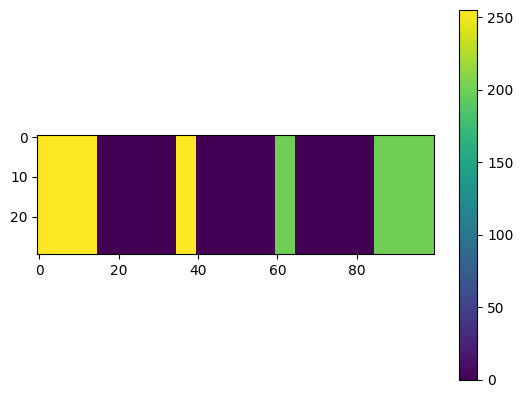

In [6]:
# Create multiple tubes in structure
structure = np.ones((30, 100, 5), dtype=np.uint8) * 255
structure[:,50:,:] = 200

mid_points = [25,50,75]
radius = 10

for mid_point in mid_points:
    structure[:, mid_point-radius:mid_point+radius, :] = 0


# Plot structure
plt.imshow(structure[:, :, 2])
plt.colorbar()
plt.show()

# save structure with swapped axes to match the normal structure format
structure = np.swapaxes(structure, 0, 2)
np.save("/hpcwork/fw641779/lbm/Test_Tubes/structure.npy", structure)
